In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movies=pd.read_csv(r"C:\Users\premc\Downloads\movie_data\movies.csv")

In [3]:
print(movies)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

In [4]:
# the shape of "movies.csv".

movies.shape

(9742, 3)

In [5]:
ratings=pd.read_csv(r"C:\Users\premc\Downloads\movie_data\ratings.csv")

In [6]:
print(ratings)

        userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
...        ...      ...     ...         ...
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

[100836 rows x 4 columns]


### the shape of "ratings.csv"

In [7]:
ratings.shape

(100836, 4)

#### UNIQUE "userId" are available in "ratings.csv"

In [8]:
ratings['userId'].nunique()

610

#### Movie has recieved maximum number of user ratings

In [9]:
rating_count=ratings['movieId'].value_counts()
max_movie_id=rating_count.idxmax()
max_rating_count=rating_count.max()
max_movie_title=movies[movies['movieId']==max_movie_id]['title'].values[0]

In [10]:
print(max_movie_title)

Forrest Gump (1994)


#### ALL the correct tags submitted by users to "Matrix, The (1999)" movie?

In [11]:
tags=pd.read_csv(r"C:\Users\premc\Downloads\movie_data\tags.csv")
print(tags)

      userId  movieId               tag   timestamp
0          2    60756             funny  1445714994
1          2    60756   Highly quotable  1445714996
2          2    60756      will ferrell  1445714992
3          2    89774      Boxing story  1445715207
4          2    89774               MMA  1445715200
...      ...      ...               ...         ...
3678     606     7382         for katie  1171234019
3679     606     7936           austere  1173392334
3680     610     3265            gun fu  1493843984
3681     610     3265  heroic bloodshed  1493843978
3682     610   168248  Heroic Bloodshed  1493844270

[3683 rows x 4 columns]


In [12]:
movies['movieId']=movies['movieId'].astype(int)
matrix_movie_id = movies[movies['title'].str.contains('Matrix', case=False) & movies['title'].str.contains('1999')]['movieId'].values
print(matrix_movie_id)

[2571]


In [13]:
matrix_tags=tags[tags['movieId']==2571]

In [14]:
print(matrix_tags)

      userId  movieId                 tag   timestamp
815      424     2571        martial arts  1457842912
816      424     2571              sci-fi  1457842899
1646     474     2571  alternate universe  1137204991
2794     537     2571          philosophy  1424141098
2795     537     2571    post apocalyptic  1424141101


In [15]:
terminator_movie_id = movies[movies['title'].str.contains('Terminator 2: Judgment Day ', case=False) &   movies['title'].str.contains('1991')]['movieId'].values
print(terminator_movie_id)

[589]


In [16]:
average_rating=ratings[ratings['movieId']==terminator_movie_id[0]]['rating'].mean()

In [17]:
print(average_rating)

3.970982142857143


In [18]:
fightclub_movie_id = movies[movies['title'].str.contains('Fight Club ', case=False) &   movies['title'].str.contains('1999')]['movieId'].values
print(fightclub_movie_id)

[2959]


In [19]:
fightclub_ratings=ratings[ratings['movieId']==fightclub_movie_id[0]]['rating']

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Count'>

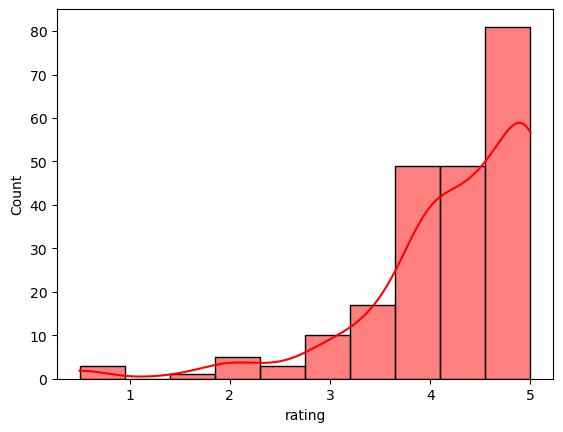

In [20]:
sns.histplot(fightclub_ratings,bins=10,kde=True,color='red')

In [21]:
grouped_ratings=ratings.groupby('movieId').agg(rating_count=('rating','count'),rating_mean=('rating','mean')).reset_index()

In [22]:
merged_data=pd.merge(movies,grouped_ratings,on='movieId',how='inner')

In [23]:
popular_movies=merged_data[merged_data['rating_count']>50]

#### The most popular based on  average user ratings

In [24]:
most_popular_movie=popular_movies.loc[popular_movies['rating_mean'].idxmax()]

In [25]:
print(most_popular_movie)

movieId                                      318
title           Shawshank Redemption, The (1994)
genres                               Crime|Drama
rating_count                                 317
rating_mean                             4.429022
Name: 277, dtype: object


#### TOP 5 popular movies based on number of user ratings.

In [26]:
top_movies=popular_movies.sort_values(by='rating_count',ascending=False).head(5)

In [27]:
print(top_movies)

      movieId                             title                       genres  \
314       356               Forrest Gump (1994)     Comedy|Drama|Romance|War   
277       318  Shawshank Redemption, The (1994)                  Crime|Drama   
257       296               Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller   
510       593  Silence of the Lambs, The (1991)        Crime|Horror|Thriller   
1938     2571                Matrix, The (1999)       Action|Sci-Fi|Thriller   

      rating_count  rating_mean  
314            329     4.164134  
277            317     4.429022  
257            307     4.197068  
510            279     4.161290  
1938           278     4.192446  


In [28]:
sci_fi_movies=popular_movies[popular_movies['genres'].str.contains('Sci-Fi',case=False)]

In [29]:
sci_fi_movies=sci_fi_movies.sort_values(by='rating_count',ascending=False)

In [30]:
Third_most_popular=sci_fi_movies.iloc[2]
print(Third_most_popular)

movieId                                      480
title                       Jurassic Park (1993)
genres          Action|Adventure|Sci-Fi|Thriller
rating_count                                 238
rating_mean                                 3.75
Name: 418, dtype: object


In [31]:
print(popular_movies)

      movieId                             title  \
0           1                  Toy Story (1995)   
1           2                    Jumanji (1995)   
2           3           Grumpier Old Men (1995)   
5           6                       Heat (1995)   
6           7                    Sabrina (1995)   
...       ...                               ...   
8287   106782   Wolf of Wall Street, The (2013)   
8354   109374  Grand Budapest Hotel, The (2014)   
8358   109487               Interstellar (2014)   
8457   112852    Guardians of the Galaxy (2014)   
8673   122904                   Deadpool (2016)   

                                           genres  rating_count  rating_mean  
0     Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                      Adventure|Children|Fantasy           110     3.431818  
2                                  Comedy|Romance            52     3.259615  
5                           Action|Crime|Thriller           102     3.9

In [32]:
links=pd.read_csv(r"C:\Users\premc\Downloads\movie_data\links.csv")

In [33]:
print(links)

      movieId   imdbId    tmdbId
0           1   114709     862.0
1           2   113497    8844.0
2           3   113228   15602.0
3           4   114885   31357.0
4           5   113041   11862.0
...       ...      ...       ...
9737   193581  5476944  432131.0
9738   193583  5914996  445030.0
9739   193585  6397426  479308.0
9740   193587  8391976  483455.0
9741   193609   101726   37891.0

[9742 rows x 3 columns]


In [34]:
popular_imdb_ids=links[links['movieId'].isin(popular_movies['movieId'])]['imdbId']
print(popular_imdb_ids)

0        114709
1        113497
2        113228
5        113277
6        114319
         ...   
8305     993846
8372    2278388
8376     816692
8475    2015381
8691    1431045
Name: imdbId, Length: 436, dtype: int64


In [40]:
import requests
import numpy as np
import time
from bs4 import BeautifulSoup

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0"*n_zeroes + id
    URL = f"https://www.imdb.com/title/tt{new_id}/ratings/"
    request_header = {'Content-Type': 'text/html; charset=UTF-8', 
                      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0', 
                      'Accept-Encoding': 'gzip, deflate, br'}
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text,'html.parser')
    imdb_rating = soup.find('span', attrs={'class':'sc-40b53d-1 kJANdR'})
    return imdb_rating.text if imdb_rating else np.nan
    
imdb_ratings={}
for imdbId in popular_imdb_ids:
    rating=scrapper(imdbId)
    imdb_ratings[imdbId]=rating
    time.sleep(1)

In [42]:
imdb_df=pd.DataFrame(list(imdb_ratings.items()),columns=['imdbId','imdbRating'])

In [43]:
highest_rated_movie=imdb_df.loc[imdb_df['imdbRating'].idxmax()]

In [44]:
print(highest_rated_movie)

imdbId        111161
imdbRating       9.3
Name: 53, dtype: object


In [45]:
movie_id=links.loc[links['imdbId']==111161,'movieId'].values[0]
print(movie_id)

318


In [46]:
sci_fi_imdb=pd.merge(sci_fi_movies,links,on='movieId')

In [47]:
sci_fi_ratings=pd.merge(sci_fi_imdb,ratings,on='movieId')

In [48]:
highest_scifi=sci_fi_ratings.loc[sci_fi_ratings['rating'].idxmax()]

In [49]:
print(highest_scifi)

movieId                           2571
title               Matrix, The (1999)
genres          Action|Sci-Fi|Thriller
rating_count                       278
rating_mean                   4.192446
imdbId                          133093
tmdbId                           603.0
userId                               1
rating                             5.0
timestamp                    964981888
Name: 0, dtype: object
